## Day 5 working lunch exercise


You have 2 hours to complete this excercise. You may work together but each student should turn in their own copy of the exercise. We will grade on effort so please do your best to answer all the questions and work together!

Create a Python notebook to run and document your analysis. You can start with this notebook, or from another existing notebook. When finished, export the notebook and submit it to Blackboard.

1. The half-life of P-32 radioactive isotope is 14.32 days. If you receive a vial of P32 containing 1000 atoms, how many atoms do you have left after 7 days? Plot the radioactive decay function and calculate number of remaining atoms at 7 days. 

In [23]:
##to get you started
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plot

##using the half-life given to calculate the rate of decay
#k = math.log(2)/14.2
#k 

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.829e-01  2.012e+00  7.000e+00]
        y: [[ 1.000e+03  9.911e+02  9.064e+02  7.106e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 20
     njev: 0
      nlu: 0


Text(0, 0.5, 'no. of P32 atoms')

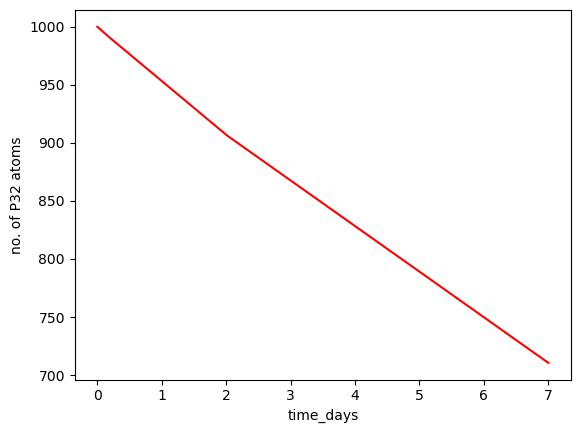

In [24]:
#Start DJH code - all elese from this point forward, written by me
#define an exponential decay function in terms of time, t, and concentration, C
def decay(t,N):
    k =math.log(2)/14.2 # defining k in the function variable in terms of days
    rate = -k * N #k is negative because the sample is decaying 
    return rate 

N_0 = [1000] #atoms at time 0
time_span=[0,7] #time span in days, starting at time =0 to time =7 with an interval of one day 
N_solver=solve_ivp(decay, time_span, N_0)
print(N_solver)

plot.plot(N_solver.t, N_solver.y[0], 'r-')
plot.xlabel('time_days')
plot.ylabel('no. of P32 atoms')


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.829e-01  2.012e+00  2.031e+01  3.829e+01
             5.630e+01  7.430e+01  9.231e+01  1.000e+02]
        y: [[ 1.000e+03  9.911e+02  9.064e+02  3.713e+02  1.544e+02
              6.415e+01  2.665e+01  1.107e+01  7.606e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


Text(0, 0.5, 'no. of P32 atoms')

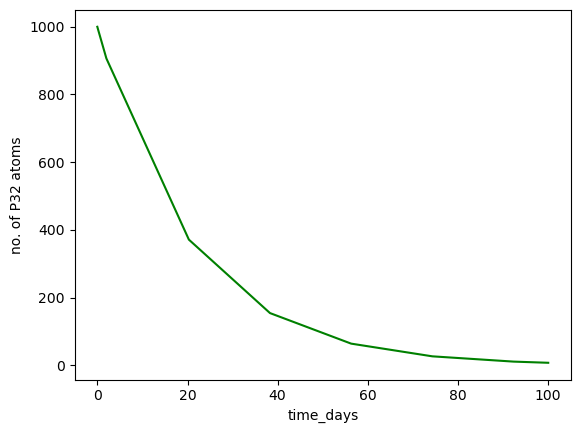

In [25]:
#Check the above equations for a longer time of decay to verify the function 

def decay(t,N):
    k =math.log(2)/14.2
    rate = -k * N #k is negative because the sample is decaying 
    return rate 

N_0 = [1000] #atoms at time 0
time_span=[0,100] #time span in days, starting at time =0 to time =7 with an interval of one day 
N_solver=solve_ivp(decay, time_span, N_0)
print(N_solver)

plot.plot(N_solver.t, N_solver.y[0], 'g-')
plot.xlabel('time_days')
plot.ylabel('no. of P32 atoms')

Answer:

2. You are tracking the growth of two bacterial strains over time. You notice that the two strains grow slightly differently, but what affect does strain have on the doubling time? To answer this, you will need to:
a) Tidy the following dataset and plot growth of the two samples
b) Fit a curve of exponential growth to the dataset
c) Use this curve to estimate growth rate and compare between the two. 

Data is in the file `TECANgrowth.csv`

In [27]:
import pandas as pd
import numpy as np 

In [28]:
#import raw TECAN data from csv 
tecan_raw=pd.read_csv('/home/dhunt22/bcmb_bootcamp/day4/data/TECANgrowth.csv')
tecan_raw


,Unnamed: 0,0,10,20,30,40,50,60,70,80,...,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390
0,WT_0,0.2010,0.2165,0.2298,0.2429,0.2606,0.2809,0.3113,0.3467,0.3684,...,0.5284,0.5270,0.5273,0.5290,0.5267,0.5300,0.5287,0.5295,0.5328,0.5276
1,kd_0,0.1922,0.1970,0.2044,0.2122,0.2185,0.2297,0.2463,0.2661,0.2945,...,0.4359,0.4368,0.4374,0.4375,0.4362,0.4411,0.4380,0.4385,0.4374,0.4383


In [6]:
#Find column names
tecan_raw.columns

Index(['Unnamed: 0', '0', '10', '20', '30', '40', '50', '60', '70', '80',
       ...
       '1300', '1310', '1320', '1330', '1340', '1350', '1360', '1370', '1380',
       '1390'],
      dtype='object', length=141)

In [7]:
#Tidy data
#Melt by first column name 
tecan_melt=tecan_raw.melt(id_vars='Unnamed: 0')
tecan=tecan_melt.rename(columns={'Unnamed: 0': 'Strain', 'variable': 'time_min', 'value': 'OD600'})
tecan



,Strain,time_min,OD600
0,WT_0,0,0.2010
1,kd_0,0,0.1922
2,WT_0,10,0.2165
3,kd_0,10,0.1970
4,WT_0,20,0.2298
...,...,...,...
275,kd_0,1370,0.4385
276,WT_0,1380,0.5328
277,kd_0,1380,0.4374
278,WT_0,1390,0.5276


In [8]:
 #Need to import plotnine 
import plotnine as p9

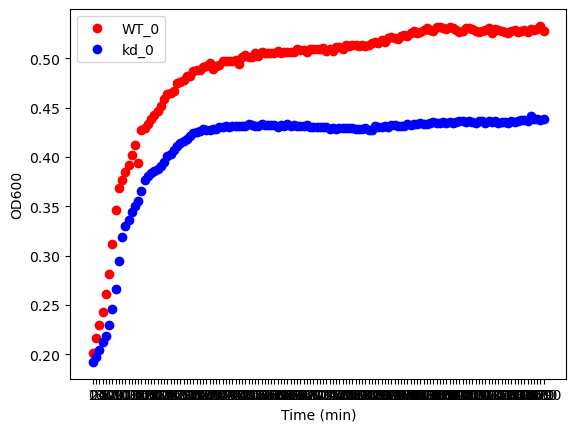

In [9]:
#Now that data are tidy, can plot data using matplotlib

wt_growth = tecan[tecan["Strain"]== "WT_0"]
kd_growth = tecan[tecan["Strain"]=="kd_0"]

plot.plot(wt_growth.time_min, wt_growth.OD600, 'ro')
plot.plot(kd_growth.time_min, kd_growth.OD600, 'bo')
plot.xlabel('Time (min)')
plot.ylabel('OD600')
plot.legend(['WT_0','kd_0'])



In [10]:
from scipy import optimize
from scipy.interpolate import interp1d

In [11]:
wt_growth["time_min"] = pd.to_numeric(wt_growth['time_min'])
kd_growth["time_min"] = pd.to_numeric(kd_growth['time_min'])

/tmp/ipykernel_2767837/1645634247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2767837/1645634247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
#Set an logistic growth curve to the data 
def log_growth(t, N0, K, r): #t is time, N0 is initial pop size, K is carrying capacity, and r is growth rate 
    N = N0*K/(N0 + (K-N0) * np.exp(-r*t)) #This is the logistic growth equation 
    return N


In [13]:
#define exponential growth parameters for each strain 
wt_param, wt_param_covar = optimize.curve_fit(log_growth, wt_growth.time_min, wt_growth.OD600)
wt_param


/home/dhunt22/mambaforge/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp


array([0.22299826, 0.51715107, 0.01103049])

In [14]:
fit_wt=log_growth(wt_growth.time_min, wt_param[0], wt_param[1], wt_param[2])

Text(0, 0.5, 'OD600')

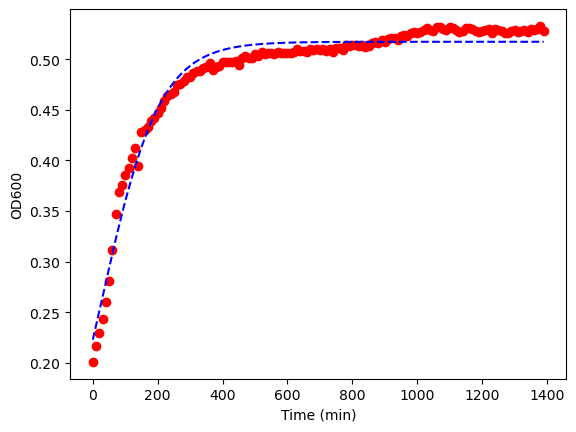

In [15]:
plot.plot(wt_growth.time_min, wt_growth.OD600, 'ro')
plot.plot(wt_growth.time_min, fit_wt, 'b--')
#plot.plot(kd_growth.time_min, kd_growth.OD600, 'bo')
plot.xlabel('Time (min)')
plot.ylabel('OD600')
#plot.legend(['WT_0','kd_0'])


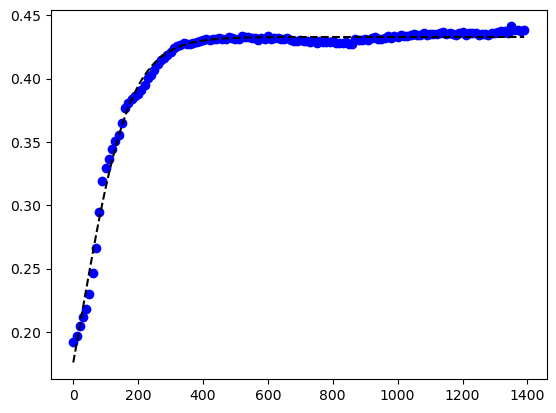

In [16]:
#repeat covar function with kd_0 data set 

kd_param, kd_param_covar = optimize.curve_fit(log_growth, kd_growth.time_min, kd_growth.OD600)
kd_param

fit_kd=log_growth(kd_growth.time_min, kd_param[0], kd_param[1], kd_param[2])

plot.plot(kd_growth.time_min, kd_growth.OD600, 'bo')
plot.plot(kd_growth.time_min, fit_kd, 'k--')



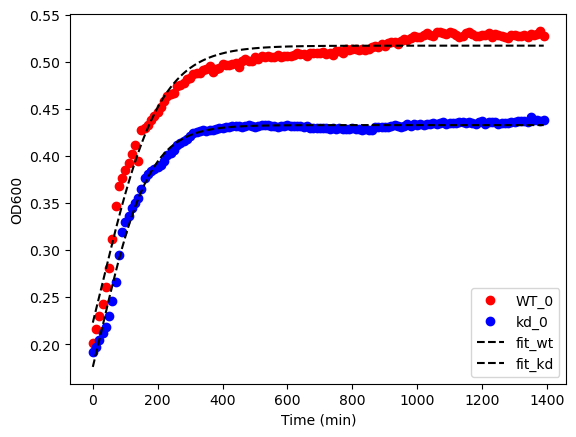

In [17]:
#Plot all data sets and trend lines on the same plot 
plot.plot(wt_growth.time_min, wt_growth.OD600, 'ro')
plot.plot(kd_growth.time_min, kd_growth.OD600, 'bo')
plot.plot(wt_growth.time_min, fit_wt, 'k--')
plot.plot(kd_growth.time_min, fit_kd, 'k--')
plot.xlabel('Time (min)')
plot.ylabel('OD600')
plot.legend(['WT_0','kd_0', 'fit_wt', 'fit_kd'])

In [18]:
#Extract the growth rates from the arrays, compare their numerical values and make a statement regarding the growth rates

wt_rate=float(wt_param[2]) #extracts the third value from the parameter array, the growth rate (r)
kd_rate=float(kd_param[2]) #extracts the third value from the parameter array, (r)

print(f'WT Growth Rate=', wt_rate)
print(f'kd Growth Rate=', kd_rate)
if wt_rate > kd_rate:
    print('WT rate > kd rate')
elif wt_rate == kd_rate:
    print('WT rate = kd rate')
else:
    print('WT rate < kd rate')


WT Growth Rate= 0.011030490892194378
kd Growth Rate= 0.013496343185638231
WT rate < kd rate


In [40]:
#try this using plotnine 

tecan_melt_float=tecan.copy()
tecan_melt_float['time_min']=tecan['time_min'].astype(float)
tecan_melt_float

,Strain,time_min,OD600
0,WT_0,0.0,0.2010
1,kd_0,0.0,0.1922
2,WT_0,10.0,0.2165
3,kd_0,10.0,0.1970
4,WT_0,20.0,0.2298
...,...,...,...
275,kd_0,1370.0,0.4385
276,WT_0,1380.0,0.5328
277,kd_0,1380.0,0.4374
278,WT_0,1390.0,0.5276


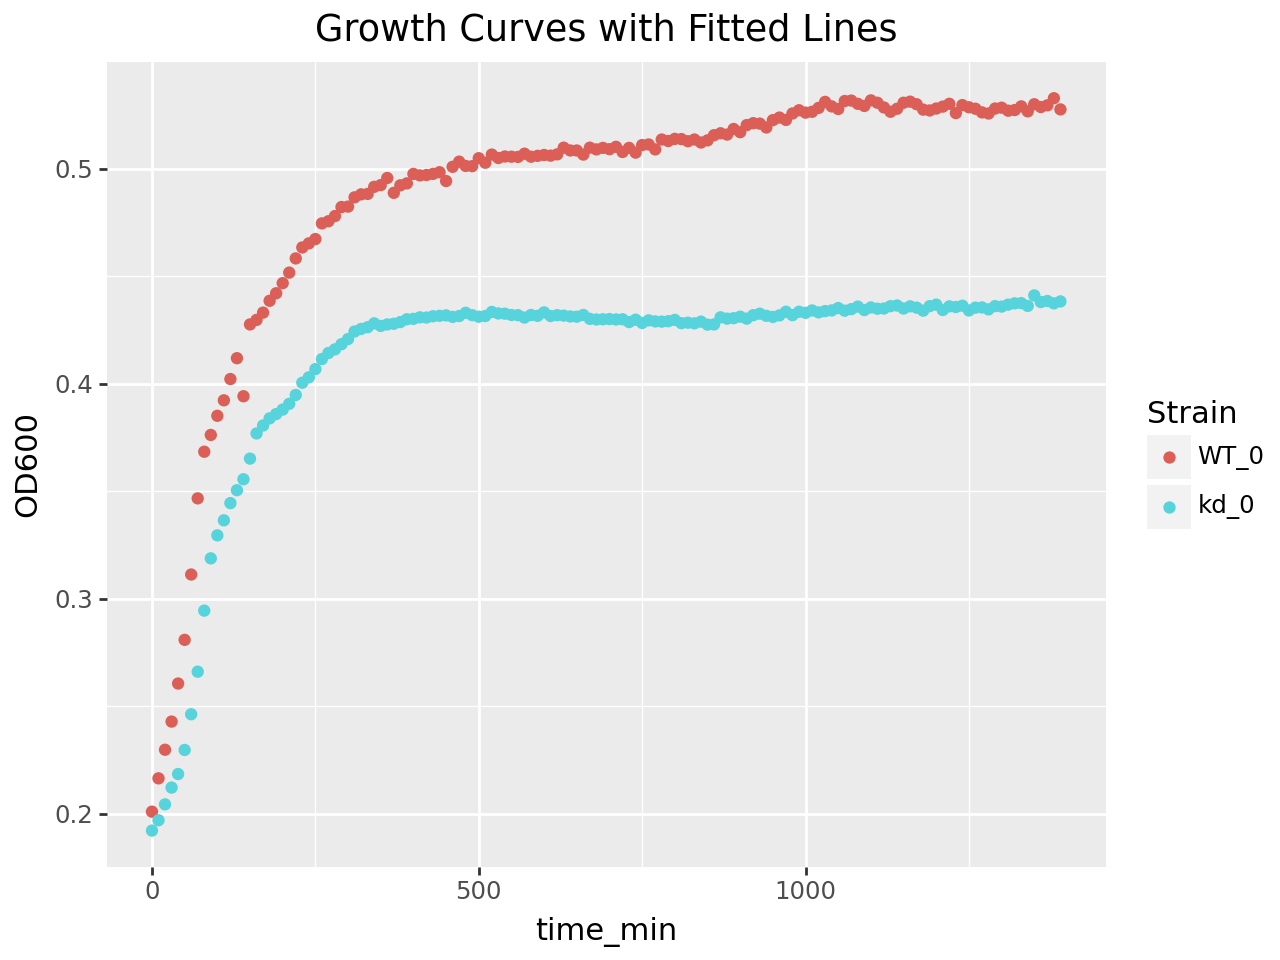

In [50]:
p9.ggplot(data=tecan_melt_float, mapping=p9.aes(x='time_min', y='OD600', color='Strain')) + p9.geom_point() +p9.ggtitle('Growth Curves with Fitted Lines')


